In [56]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt


In [57]:
stock_tickers = {
    "Garden Reach Shipbuilders & Engineers": "GRSE.NS",
    "Zen Technologies": "ZENTEC.NS",
    "Hindustan Aeronautics": "HAL.NS",
    "Bharat Electronics": "BEL.NS",
    "Paras Defence and Space Technologies": "PARAS.NS",
    "Bharat Dynamics": "BDL.NS",
    "NTPC": "NTPC.NS",
    "ONGC": "ONGC.NS",
    "Reliance Industries": "RELIANCE.NS",
    "Power Grid Corp": "POWERGRID.NS",
    "Adani Green Energy": "ADANIGREEN.NS",
    "TATA Power": "TATAPOWER.NS",
    "Bikaji Foods International Ltd": "BIKAJI.NS",
    "Hindustan Foods": "HINDFOOD.NS",
    "Zydus Wellness": "ZYDUSWELL.NS",
    "Avanti Feeds": "AVANTIFEED.NS",
    "Sapphire Foods India": "SAPPHIRE.NS",
    "Nestle": "NESTLEIND.NS",
    "Equitas Small Finance Bank Ltd": "EQUITASBNK.NS",
    "J&K Bank": "J&KBANK.NS",
    "PNB": "PNB.NS",
    "Yes Bank": "YESBANK.NS",
    "CSB Bank Ltd": "CSBBANK.NS",
    "Motilal Oswal Financial Services": "MOTILALOFS.NS",
    "Bajaj Housing Finance": None,  # Not listed separately on NSE
    "Jio Financials": "JIOFIN.NS",
    "Zydus Lifesciences": "ZYDUSLIFE.NS",
    "Apollo Hospitals": "APOLLOHOSP.NS",
    "Rainbow Children's Medicare": "RAINBOW.NS",
    "Sun Pharma": "SUNPHARMA.NS",
    "Torrent Pharma": "TORNTPHARM.NS",
    "Mankind Pharma": "MANKIND.NS",
    "Cipla": "CIPLA.NS",
    "Dr. Lal PathLabs": "LALPATHLAB.NS",
    "Narayana Hrudayalaya": "NH.NS",
    "Aster DM Healthcare": "ASTERDM.NS",
    "KNR Construction": "KNRCON.NS",
    "HG Infra Engineering": "HGINFRA.NS",
    "GTL Infrastructure": "GTLINFRA.NS",
    "REC Ltd": "RECLTD.NS",
    "ITD Cementation": "ITDCEM.NS",
    "Ashoka Buildcon": "ASHOKA.NS",
    "PNC Infratech": "PNCINFRA.NS",
    "RVNL": "RVNL.NS",
    "ISGEC Heavy Engineering": "ISGEC.NS"
}




In [58]:
#52 WEEK HIGH AND LOW
# Collecting data
stock_data = []
for name, ticker in stock_tickers.items():
    if ticker:
        try:
            stock = yf.Ticker(ticker)
            hist = stock.history(period="1y")
            high_52 = hist['High'].max()
            low_52 = hist['Low'].min()
            stock_data.append([name, ticker, round(high_52, 2), round(low_52, 2)])
        except Exception as e:
            stock_data.append([name, ticker, None, None])
    else:
        stock_data.append([name, "Not Listed", None, None])



# Create and export DataFrame

df = pd.DataFrame(stock_data, columns=["Stock Name", "Ticker", "52 Week High", "52 Week Low"])
df['52 Week Mean'] = (df['52 Week High'] + df['52 Week Low']) / 2


$HINDFOOD.NS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")


In [59]:
# Equity Research
# Data collection
target_data = []

for name, ticker in stock_tickers.items():
    try:
        if ticker:
            stock = yf.Ticker(ticker)
            info = stock.info

            target_low = info.get("targetLowPrice", None)
            target_high = info.get("targetHighPrice", None)
            target_mean = info.get("targetMeanPrice", None)
            target_median = info.get("targetMedianPrice", None)
        else:
            target_low = target_high = target_mean = target_median = None

        target_data.append([name, target_low, target_high, target_mean, target_median])
    except Exception as e:
        print(f"Error fetching for {name}: {e}")
        target_data.append([name, None, None, None, None])

# Create a DataFrame from the collected target data
target_df = pd.DataFrame(
    target_data,
    columns=["Stock Name", "target_low", "target_high", "target_mean", "target_median"]
)

# Merge with your main df on "Stock Name"
df = df.merge(target_df, on="Stock Name", how="left")
# ...existing code...


HTTP Error 404: 


In [60]:
#EV/EBITDA Calculation Trading comps
results = []
for name, ticker in stock_tickers.items():
    try:
        stock = yf.Ticker(ticker)
        info = stock.info

        # Get financials
        market_cap = info.get("marketCap")
        total_debt = info.get("totalDebt", 0)
        cash = info.get("totalCash", 0)
        ebitda = info.get("ebitda", None)

        # Calculate EV
        if ebitda and ebitda != 0:
            enterprise_value = market_cap + total_debt - cash
            ev_ebitda = enterprise_value / ebitda
        else:
            enterprise_value = None
            ev_ebitda = None

        results.append([
            name, ebitda, enterprise_value, round(ev_ebitda, 2) if ev_ebitda else None
        ])
    except Exception as e:
        print(f"Error fetching data for {name}: {e}")
        results.append([name, None, None, None])

        # Create a DataFrame from the collected target data
target_df = pd.DataFrame(
    results,
    columns=["Stock Name", "Ebitda", "EV", "EV_Ebitda"]
)

# Merge with your main df on "Stock Name"
df = df.merge(target_df, on="Stock Name", how="left")
# ...existing code...


HTTP Error 404: 


Error fetching data for Bajaj Housing Finance: 'NoneType' object has no attribute 'upper'


In [61]:
#EV/EBITDA Calculation Transaction comps cannot be catculated through yfinance, its requires some paid API
# This section is left as a placeholder for future implementation


In [62]:
#dcf calculation
# Ensure df is defined
growth_rates = [0.06, 0.08, 0.10]
discount_rates = [0.11, 0.10, 0.09]
terminal_rates = [0.03, 0.04, 0.05]
projection_years = 5

# Prepare result storage
results = []

# Loop through each stock
for idx, row in df.iterrows():
    name = row["Stock Name"]
    ticker = row["Ticker"]

    try:
        stock = yf.Ticker(ticker)
        info = stock.info
        cashflow = stock.cashflow

        # Find CFO
        cfo_labels = [
            "Operating Cash Flow",
            "Total Cash From Operating Activities",
            "Cash Flow From Operating Activities"
        ]
        cfo = next((cashflow.loc[label].iloc[0] for label in cfo_labels if label in cashflow.index), None)
        if cfo is None:
            raise ValueError("Operating Cash Flow not found.")

        # Find CapEx
        capex_labels = [
            "Capital Expenditures",
            "Capital Expenditure",
            "Purchase of Property Plant and Equipment"
        ]
        capex = next((cashflow.loc[label].iloc[0] for label in capex_labels if label in cashflow.index), None)
        if capex is None:
            raise ValueError("Capital Expenditure not found.")

        # Compute FCF
        fcf = cfo + capex  # Note: CapEx is negative

        # Shares
        shares = info.get("sharesOutstanding") or info.get("floatShares")
        if not shares:
            raise ValueError("Shares outstanding not found.")

        # Net debt
        total_debt = info.get("totalDebt", 0)
        total_cash = info.get("totalCash", 0)
        net_debt = total_debt - total_cash

        intrinsic_values = []
        for g in growth_rates:
            for d in discount_rates:
                for t in terminal_rates:
                    if t >= d:
                        continue
                    fcfs = [fcf * (1 + g) ** i for i in range(1, projection_years + 1)]
                    terminal_value = fcfs[-1] * (1 + t) / (d - t)
                    discounted_fcfs = [fcf / (1 + d) ** (i + 1) for i, fcf in enumerate(fcfs)]
                    discounted_terminal = terminal_value / (1 + d) ** projection_years
                    ev = sum(discounted_fcfs) + discounted_terminal
                    equity_value = ev - net_debt
                    intrinsic_per_share = equity_value / shares
                    intrinsic_values.append(intrinsic_per_share)

        if not intrinsic_values:
            raise ValueError("No valid DCF scenarios.")
        dcf_low = round(min(intrinsic_values), 2)
        dcf_high = round(max(intrinsic_values), 2)

    except Exception as e:
        dcf_low = dcf_high = None

    results.append([name, dcf_low, dcf_high])

# Create DCF DataFrame
dcf_df = pd.DataFrame(results, columns=["Stock Name", "DCF Low", "DCF High"])

# Merge with master df
df = df.merge(dcf_df, on="Stock Name", how="left")
df['DCF Mean'] = (df['DCF Low'] + df['DCF High']) / 2


HTTP Error 404: 
HTTP Error 404: 


In [63]:
# DCF with Synergies
# CONFIGURATION
growth_rates = [0.06, 0.08, 0.10]
discount_rates = [0.11, 0.10, 0.09]
terminal_rates = [0.03, 0.04, 0.05]
projection_years = 5

synergy_growth_rates = [0.02, 0.03, 0.04]
synergy_duration = 3

results = []

for name, ticker in stock_tickers.items():    
    try:
        stock = yf.Ticker(ticker)
        info = stock.info
        cashflow = stock.cashflow

        # Get FCF
        cfo = next((cashflow.loc[lbl].iloc[0] for lbl in ["Operating Cash Flow", "Total Cash From Operating Activities"] if lbl in cashflow.index), None)
        capex = next((cashflow.loc[lbl].iloc[0] for lbl in ["Capital Expenditure", "Capital Expenditures"] if lbl in cashflow.index), None)
        if cfo is None or capex is None:
            raise ValueError("Missing CFO or CapEx.")
        fcf = cfo + capex

        # Shares, Debt, Cash
        shares = info.get("sharesOutstanding") or info.get("floatShares")
        if not shares:
            raise ValueError("Shares outstanding not found.")
        net_debt = info.get("totalDebt", 0) - info.get("totalCash", 0)

        # DCF Calculation with Synergies
        intrinsic_values = []
        for g in growth_rates:
            for d in discount_rates:
                for t in terminal_rates:
                    if t >= d:
                        continue
                    for s_g in synergy_growth_rates:
                        base_fcfs = [fcf * (1 + g) ** year for year in range(1, projection_years + 1)]

                        synergy_fcfs = []
                        for year in range(1, projection_years + 1):
                            if year <= synergy_duration:
                                synergy_fcf = base_fcfs[year - 1] * (1 + s_g)
                            else:
                                synergy_fcf = base_fcfs[year - 1]
                            synergy_fcfs.append(synergy_fcf)

                        terminal_fcf = base_fcfs[-1] * (1 + t)
                        terminal_value = terminal_fcf / (d - t)

                        discounted_fcfs = [fcf / (1 + d) ** year for year, fcf in enumerate(synergy_fcfs, 1)]
                        discounted_terminal = terminal_value / (1 + d) ** projection_years

                        ev = sum(discounted_fcfs) + discounted_terminal
                        equity_value = ev - net_debt
                        intrinsic_per_share = equity_value / shares
                        intrinsic_values.append(round(intrinsic_per_share, 2))


        if len(set(intrinsic_values)) <= 1:
            dcf_low = dcf_high = None
        else:
            dcf_low = min(intrinsic_values)
            dcf_high = max(intrinsic_values)
    except Exception as e:
        dcf_low = dcf_high = None

    results.append([name, dcf_low, dcf_high])

# Final DataFrame
dcf_synergy_df = pd.DataFrame(results, columns=["Stock Name", "DCF+Synergy Low", "DCF+Synergy High"])
df = df.merge(dcf_synergy_df[["Stock Name", "DCF+Synergy Low", "DCF+Synergy High"]], on="Stock Name", how="left")
df['Mean DCF+Synergy'] = (df['DCF+Synergy Low'] + df['DCF+Synergy High']) / 2


HTTP Error 404: 


In [64]:
# CAGR Calculation for LBO
years = 5
results = []
for name, ticker in stock_tickers.items():
    try:
        if ticker:
            stock = yf.Ticker(ticker)
            # Get financials from yfinance (only TTM EBITDA is available directly)
            financials = stock.get_financials(freq='yearly')
            if 'EBITDA' in financials.index:
                ebitda_series = financials.loc['EBITDA']
                ebitda_values = ebitda_series.dropna().values

                if len(ebitda_values) < years:
                    results.append([name, None])
                    continue

                ebitda_start = ebitda_values[-years]
                ebitda_end = ebitda_values[-1]

                if ebitda_start <= 0 or ebitda_end <= 0:
                    results.append([name, None])
                    continue

                cagr = (ebitda_end / ebitda_start) ** (1 / years) - 1
                results.append([name, cagr])
            else:
                results.append([name, None])
        else:
            results.append([name, None])
    except Exception as e:
        results.append([name, None])

target_df = pd.DataFrame(
    results,
    columns=["Stock Name", "CAGR"]
)

# Drop existing CAGR columns to avoid merge conflicts
df = df.drop(columns=[col for col in df.columns if col.startswith("CAGR")], errors="ignore")

# Merge with your main df on "Stock Name"
df = df.merge(target_df, on="Stock Name", how="left")
# ...existing code..
# .


In [65]:
#LBO Calculation

growth_rates = [0.06, 0.08, 0.10]
exit_multiples = [8, 10, 12]
target_irrs = [0.15, 0.20, 0.25]
years = 5
debt_percent = 0.7

results = []

for name, ticker in stock_tickers.items():
    try:
        stock = yf.Ticker(ticker)
        info = stock.info

        ebitda = info.get("ebitda")
        shares = info.get("sharesOutstanding")
        if not ebitda or not shares:
            raise ValueError("Missing EBITDA or shares.")

        intrinsic_values = []
        for g in growth_rates:
            for x in exit_multiples:
                for irr in target_irrs:
                    # Exit EBITDA and Exit EV
                    exit_ebitda = ebitda * ((1 + g) ** years)
                    exit_ev = exit_ebitda * x
                    exit_equity = exit_ev * (1 - debt_percent)

                    # Reverse IRR to get entry equity
                    max_entry_equity = exit_equity / ((1 + irr) ** years)
                    max_entry_ev = max_entry_equity / (1 - debt_percent)
                    intrinsic_per_share = max_entry_equity / shares
                    intrinsic_values.append(intrinsic_per_share)

        lbo_low = round(min(intrinsic_values), 2)
        lbo_high = round(max(intrinsic_values), 2)

    except Exception as e:
        lbo_low = lbo_high = None

    results.append([name, lbo_low, lbo_high])

# Drop existing LBO columns to avoid merge conflicts
df = df.drop(columns=[col for col in df.columns if col.startswith("LBO Low") or col.startswith("LBO High") or col.startswith("Mean LBO")], errors="ignore")

# Create DataFrame and merge
lbo_df = pd.DataFrame(results, columns=["Stock Name", "LBO Low", "LBO High"])
df = df.merge(lbo_df, on="Stock Name", how="left")
df['Mean LBO'] = (df['LBO Low'] + df['LBO High']) / 2


HTTP Error 404: 


In [66]:
#latest stock price
results = []

for name, ticker in stock_tickers.items():
    if ticker:
        try:
            stock = yf.Ticker(ticker)
            data = stock.history(period="1d", interval="1m")
            if not data.empty:
                latest_row = data.tail(1)
                latest_price = latest_row["Close"].values[0]
                latest_time = latest_row.index[-1].to_pydatetime()
                results.append([name, round(latest_price, 2)])
            else:
                results.append([name, None])
        except Exception as e:
            results.append([name, None])
    else:
        results.append([name, None])

newdf = pd.DataFrame(results, columns=["Stock Name", "Latest Price"])

# Merge with existing df
df = df.merge(newdf, on="Stock Name", how="left")


$HINDFOOD.NS: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")


In [67]:
# Approximate Value Calculation and profit difference
cols = [
	"Mean DCF+Synergy",
	"DCF Mean",
	"Mean LBO",
	"52 Week Mean",
	"target_mean",
	"EV_Ebitda"
]
# Only include columns that exist in df
cols = [col for col in cols if col in df.columns]
df['Approx Value'] = df[cols].mean(axis=1)

df['Diff'] = df['Latest Price'] - df['Approx Value']


In [68]:
df.sample(10)  # Display a sample of 10 rows for verification


,Stock Name,Ticker,52 Week High,52 Week Low,52 Week Mean,target_low,target_high,target_mean,target_median,Ebitda,...,DCF+Synergy Low,DCF+Synergy High,Mean DCF+Synergy,CAGR,LBO Low,LBO High,Mean LBO,Latest Price,Approx Value,Diff
13,Hindustan Foods,HINDFOOD.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
31,Mankind Pharma,MANKIND.NS,3054.80,1901.05,2477.925,2150.0,3300.0,2712.47070,2750.0,3.017930e+10,...,519.89,1349.93,934.910,None,76.95,210.78,143.865,2658.00,1206.395950,1451.604050
28,Rainbow Children's Medicare,RAINBOW.NS,1706.20,1076.95,1391.575,1475.0,1725.0,1601.50000,1605.0,4.374180e+09,...,353.58,799.01,576.295,None,45.33,124.16,84.745,1526.50,710.781667,815.718333
23,Motilal Oswal Financial Services,MOTILALOFS.NS,1055.76,503.62,779.690,763.0,1150.0,883.25000,810.0,NaN,...,79.35,360.16,219.755,None,NaN,NaN,NaN,910.80,525.268750,385.531250
20,PNB,PNB.NS,125.17,83.05,104.110,85.0,126.0,111.88235,110.0,NaN,...,246.76,569.11,407.935,None,NaN,NaN,NaN,113.37,257.571838,-144.201838
36,KNR Construction,KNRCON.NS,415.10,192.55,303.825,156.0,390.0,244.47060,240.0,1.632021e+10,...,-744.19,-361.65,-552.920,None,61.07,167.28,114.175,223.89,-72.789900,296.679900
1,Zen Technologies,ZENTEC.NS,2627.00,945.35,1786.175,1750.0,2310.0,2076.66670,2170.0,3.735237e+09,...,-551.52,-192.09,-371.805,None,43.73,119.77,81.750,1878.00,541.244450,1336.755550
16,Sapphire Foods India,SAPPHIRE.NS,401.00,275.80,338.400,290.0,406.0,351.30435,360.0,4.767580e+09,...,77.48,214.37,145.925,None,15.61,42.76,29.185,342.10,172.562392,169.537608
15,Avanti Feeds,AVANTIFEED.NS,964.20,541.50,752.850,815.0,834.0,824.50000,824.5,6.330377e+09,...,603.56,1174.89,889.225,None,48.90,133.93,91.415,753.00,576.256667,176.743333
19,J&K Bank,J&KBANK.NS,121.38,86.61,103.995,153.0,153.0,153.00000,153.0,NaN,...,-241.47,-70.86,-156.165,None,NaN,NaN,NaN,113.87,-13.623750,127.493750


In [ ]:
import os
output_path = os.path.expanduser(f"~/filename.xlsx")
df.to_excel(output_path, index=False)
print(f"File saved to {output_path}")


File saved to C:\Users\ASUS/filename_20250718_231146.xlsx


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11336\650871395.py:74: UserWarning: Glyph 9917 (\N{SOCCER BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11336\650871395.py:75: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')
c:\Users\ASUS\Desktop\py\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9917 (\N{SOCCER BALL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\ASUS\Desktop\py\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9917 (\N{SOCCER BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


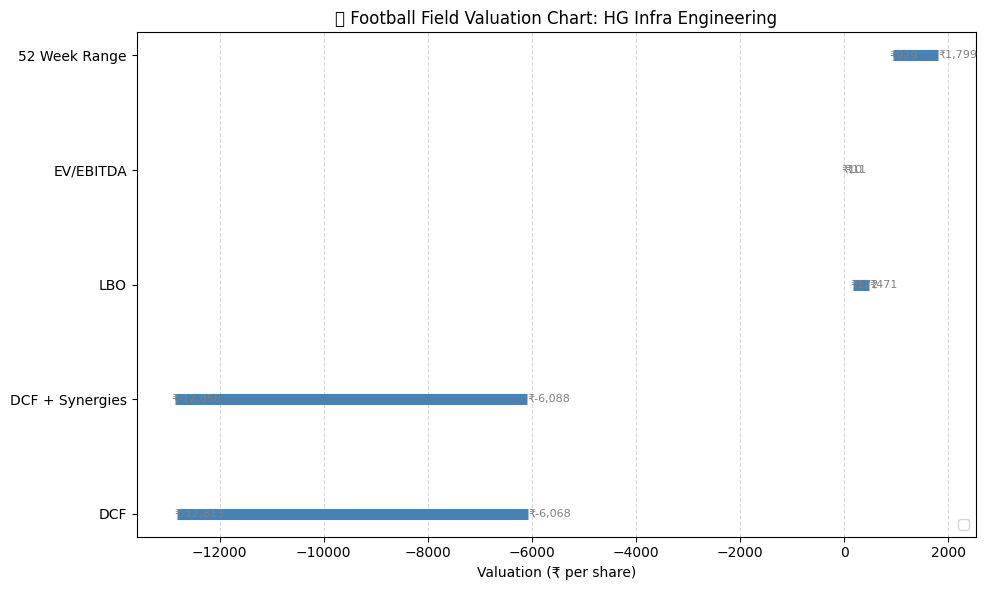

In [91]:


# Choose a company to visualize
stock_name = "HG Infra Engineering"

row = df[df["Stock Name"] == stock_name].iloc[0]

# Prepare valuation methods and ranges
methods = []
lows = []
highs = []

# Add DCF range
if pd.notnull(row["DCF Low"]) and pd.notnull(row["DCF High"]):
    methods.append("DCF")
    lows.append(row["DCF Low"])
    highs.append(row["DCF High"])

# Add DCF + Synergies range
if pd.notnull(row["DCF+Synergy Low"]) and pd.notnull(row["DCF+Synergy High"]):
    methods.append("DCF + Synergies")
    lows.append(row["DCF+Synergy Low"])
    highs.append(row["DCF+Synergy High"])

# Add LBO range
# Use the correct column names with suffixes if present
lbo_low_col = None
lbo_high_col = None
for col in row.index:
    if col.startswith("LBO Low"):
        lbo_low_col = col
    if col.startswith("LBO High"):
        lbo_high_col = col

if lbo_low_col and lbo_high_col and pd.notnull(row[lbo_low_col]) and pd.notnull(row[lbo_high_col]):
    methods.append("LBO")
    lows.append(row[lbo_low_col])
    highs.append(row[lbo_high_col])

# Add EV/EBITDA
if pd.notnull(row["EV_Ebitda"]):
    methods.append("EV/EBITDA")
    lows.append(row["EV_Ebitda"] * 0.95)  # ±5% band (optional)
    highs.append(row["EV_Ebitda"] * 1.05)

# Add 52-week range
if pd.notnull(row["52 Week Low"]) and pd.notnull(row["52 Week High"]):
    methods.append("52 Week Range")
    lows.append(row["52 Week Low"])
    highs.append(row["52 Week High"])

# Current price
current_price = row.get("Current Price")

# 🔧 Plot setup
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = range(len(methods))

# Plot horizontal bars
for i in range(len(methods)):
    ax.hlines(y=y_pos[i], xmin=lows[i], xmax=highs[i], color="steelblue", linewidth=8)
    ax.text(highs[i] + 5, y_pos[i], f"₹{highs[i]:,.0f}", va='center', fontsize=8, color='gray')
    ax.text(lows[i] - 60, y_pos[i], f"₹{lows[i]:,.0f}", va='center', fontsize=8, color='gray')

# Add vertical red dashed line for current price
if pd.notnull(current_price):
    ax.axvline(x=current_price, color='red', linestyle='--', linewidth=1.5, label="Current Price")
    ax.text(current_price + 5, len(methods) - 0.5, f"₹{current_price:.0f} (Market)", color='red', fontsize=9)

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(methods)
ax.set_xlabel("Valuation (₹ per share)")
ax.set_title(f"⚽ Football Field Valuation Chart: {stock_name}")
ax.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(loc='lower right')
# Add "Latest Price" label beside the latest price line
if pd.notnull(current_price):
    ax.axvline(x=current_price, color='red', linestyle='--', linewidth=1.5, label="Current Price")
    ax.text(current_price + 5, len(methods) - 0.5, f"₹{current_price:.0f} (Latest Price)", color='red', fontsize=9)
    # Save the football field chart as an image to Desktop
    desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "football_field_chart.png")
    fig.savefig(desktop_path, bbox_inches="tight")
    plt.show()


In [ ]:
#
